In [1]:
#调库 析晶程序判别
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
#定义距离函数
def cal_distance(x1,y1,z1,x2,y2,z2):
    dis = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(1/2)
    return dis

In [3]:
########参数列表#############
max_neigh = 6
max_dis = 6.0


In [4]:
#读取文本函数，返回直接d选帧
def get_data(path,frame_num):
    with open(path) as f:
        str_data = f.read()
    data = str_data.split()
    ###选帧#########
    #此处写个程序选帧
    atoms_num = int(data[0])
    frame_len = atoms_num*4+2
    data_len =len(data)
    max_frame = data_len // frame_len
    
    temp = []
    temp = data[frame_len*frame_num:frame_len*(frame_num+1)]

    #暂时先自行处理了表头
    temp = temp[2:]
    frame_list = []
    for i in range(atoms_num):
        frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])
    
    return frame_list

In [5]:
class point:
    def __init__(self,name,x,y,z):
        #自身坐标
        self.x=x
        self.y=y
        self.z=z
        self.name=name
        self.cry=0
        #记录最近的几个点 每个点按顺序记录下xyz和dis 
        self.neighbor_atom=[]
        #记录与最近的几个点的角度 
        self.angle=[]
    
    #定义类中的替换函数  如果这个距离比原有的小，就替换掉原有点的记录
    def show(self):
        print("name: ",self.name," xyz: ",self.x," ",self.y," " ,self.z)
        print("neighbor: ")
        for i in self.neighbor_atom:
            print(i)
        print("angle: ")
        for i in self.angle:
            print(i)
            
    def sub(self,x,y,z,dis,max_dis):
        
        #为空的话直接放进去
        if(len(self.neighbor_atom)==0):
            self.neighbor_atom.append([x,y,z,dis])
            return
        #大多数点是比表中最大的点距离大的 所以大的直接返回
        if(dis>max_dis):
            return
        #如果需要调整,那么先插入表尾，再排序，再删除最后一个节点就行
        else:
            self.neighbor_atom.append([x,y,z,dis])
            self.neighbor_atom.sort(key=lambda xx:xx[-1])
            #如果表满了则删除最后一个 或者最后一个大于了max dis
            if(len(self.neighbor_atom)>max_neigh or self.neighbor_atom[-1][-1]>max_dis):
                del self.neighbor_atom[-1]
    
    def filter_neighbor(self,max_dis):
        self.neighbor_atom.sort(key=lambda xx:xx[-1])
        for i in range(len(self.neighbor_atom)-1,-1,-1):
            if(self.neighbor_atom[-1][-1]>max_dis):
                self.neighbor_atom.pop()
    
    #计算以中心点为顶点，距离最近的任意两点为边的角的角度值
#     def cal_angle(self):
#         for i in range(len(self.neighbor_atom)):
#             for j in range(i+1,len(self.neighbor_atom)):
#                 #此时便有了point nei[i] nei[j]三个点
#                 #定义两个空间向量
#                 x1,y1,z1 = (self.neighbor_atom[i][0]-self.x),(self.neighbor_atom[i][1]-self.y),(self.neighbor_atom[i][2]-self.z)
#                 x2,y2,z2 = (self.neighbor_atom[j][0]-self.x),(self.neighbor_atom[j][1]-self.y),(self.neighbor_atom[j][2]-self.z)
#                 #两个向量的夹角
#                 cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2)))
#                 B = math.degrees(math.cos(cos_b)) 
#                 self.angle.append(B)
    def cal_angle(self):
        self.angle.clear()
        for i in range(len(self.neighbor_atom)):
            for j in range(i+1,len(self.neighbor_atom)):
                a = [self.neighbor_atom[i][0], self.neighbor_atom[i][1], self.neighbor_atom[i][2]]
                
                b = [self.x, self.y, self.z]
                
                c=[self.neighbor_atom[j][0], self.neighbor_atom[j][1], self.neighbor_atom[j][2]]
                
                temp = fun_angle(a,b,c)
                self.angle.append(temp)
        self.angle.sort()
    #最后还应该有一个判断是不是晶体的程序
    def judge_cry(self):
        pass

In [6]:
def classify_atom(data,atom_type):
    ans_list = []
    a_type =len(atom_type)
    for i in range(a_type):
        ans_list.append([])

    for i in data:
        for j in range(a_type):
               if(i[0]==atom_type[j]):
                    ans_list[j].append(point(i[0],i[1],i[2],i[3]))
    return ans_list 

# 主函数

In [7]:
############主函数##############

file_path = r'C:\Users\zhang\Desktop\p3000-fix.xyz'
new_name = r'C:\Users\zhang\Desktop\frame_ana_cry.xyz'
data = get_data(file_path,530)

####获取元素分类列表
(nb_list,li_list,o_list,si_list) = classify_atom(data,['Nb','Li','O','Si'])


In [8]:
##此处分为两种情况，一个是计算Nb-Nb之间的距离，一个是计算Nb-O之间的距离
#这里计算Nb-Nb距离
for i in range(len(nb_list)):
    for j in range(i+1,len(nb_list)):
        dis = cal_distance(nb_list[i].x, nb_list[i].y, nb_list[i].z,nb_list[j].x,nb_list[j].y,nb_list[j].z)
        #通过计算各个点的距离  如果距离小了就放入列表中
        nb_list[i].sub(nb_list[j].x, nb_list[j].y, nb_list[j].z, dis, max_dis)
        nb_list[j].sub(nb_list[i].x, nb_list[i].y, nb_list[i].z, dis, max_dis)

In [9]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@Time     : 2021/8/10 9:16
@Author   : Allen Pen(Haijun Peng)
@E-mail   : shengyutou@outlook.com
NOTE:
"""
import math


def fun_angle(point_a, point_b, point_c):
    """
    根据三点坐标计算夹角

                  点a
           点b ∠
                   点c

    :param point_a、point_b、point_c: 数据类型为list,二维坐标形式[x、y]或三维坐标形式[x、y、z]
    :return: 返回角点b的夹角值


    数学原理：
    设m,n是两个不为0的向量，它们的夹角为<m,n> (或用α ,β, θ ,..,字母表示)

    1、由向量公式：cos<m,n>=m.n/|m||n|

    2、若向量用坐标表示，m=(x1,y1,z1), n=(x2,y2,z2),

    则,m.n=(x1x2+y1y2+z1z2).

    |m|=√(x1^2+y1^2+z1^2), |n|=√(x2^2+y2^2+z2^2).

    将这些代入②得到：

    cos<m,n>=(x1x2+y1y2+z1z2)/[√(x1^2+y1^2+z1^2)*√(x2^2+y2^2+z2^2)]

    上述公式是以空间三维坐标给出的，令坐标中的z=0,则得平面向量的计算公式。

    两个向量夹角的取值范围是：[0,π].

    夹角为锐角时，cosθ>0；夹角为钝角时,cosθ<0.

    """
    a_x, b_x, c_x = point_a[0], point_b[0], point_c[0]  # 点a、b、c的x坐标
    a_y, b_y, c_y = point_a[1], point_b[1], point_c[1]  # 点a、b、c的y坐标

    if len(point_a) == len(point_b) == len(point_c) == 3:
        # print("坐标点为3维坐标形式")
        a_z, b_z, c_z = point_a[2], point_b[2], point_c[2]  # 点a、b、c的z坐标
    else:
        a_z, b_z, c_z = 0,0,0  # 坐标点为2维坐标形式，z 坐标默认值设为0
        # print("坐标点为2维坐标形式，z 坐标默认值设为0")

    # 向量 m=(x1,y1,z1), n=(x2,y2,z2)
    x1,y1,z1 = (a_x-b_x),(a_y-b_y),(a_z-b_z)
    x2,y2,z2 = (c_x-b_x),(c_y-b_y),(c_z-b_z)

    # 两个向量的夹角，即角点b的夹角余弦值
    cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2))) # 角点b的夹角余弦值
    B = math.degrees(math.acos(cos_b)) # 角点b的夹角值
    return B

In [10]:
for i in nb_list:
    i.cal_angle()

In [11]:
#################现在把计算后得来的数据都复制好，之后再对数据处理就不要对原始数据进行更改了

copy_list_nbnb =nb_list.copy() 

#再来个分析NbO之间键角的列
nb_O_list  = nb_list
list_Nb_O = []
#先把O存入Nb最近的列表中
for i in nb_O_list:
    for j in o_list:
        #大于dis的直接返回 没有计算的意义
        if(abs(i.x-j.x)>max_dis or abs(i.y-j.y)>max_dis or abs(i.z-j.z)>max_dis):
            continue
        
        dis = cal_distance(i.x, i.y, i.z, j.x, j.y, j.z)
        i.sub(j.x ,j.y, j.z, dis,max_dis)
        j.sub(i.x, i.y, i.z, dis, max_dis)
#再计算最近原子的角度
for i in nb_O_list:
    i.cal_angle()

# 以下是分析程序

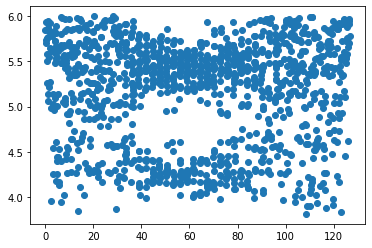

In [12]:
#这个函数观察表里的每个点的最大neigh分布
x,y = [],[]
for i in copy_list_nbnb:
    t = 0
    for j in i.neighbor_atom:
        if(j[-1]>t):
            t=j[-1]
        if(j[-1]>10):
            i.show()
    x.append(i.x)
    y.append(t)
plt.scatter(x,y)

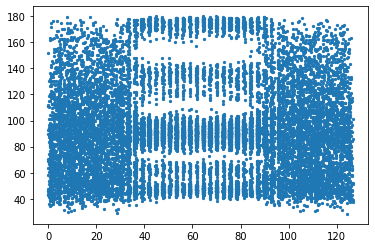

In [13]:
#此处是为了观察Nb与Nb之间的键角分布

x,y = [],[]
for i in copy_list_nbnb:
    for j in i.angle:
        y.append(j)
        x.append(i.x)
plt.scatter(x,y,s=5)


In [14]:
copy_list_nbnb[80].show()

name:  Nb  xyz:  50.64274   1.254788   9.1661
neighbor: 
[50.59594, 3.923778, 11.93808, 3.8483205402486935]
[53.63924, 3.128978, 6.94776, 4.172844684588679]
[47.51744, 2.954258, 6.66197, 4.350444279358146]
[53.34304, 5.842378, 9.5919, 5.340309704324272]
[53.30374, 0.133399, 4.34409, 5.620517300873735]
[47.58804, 5.980918, 9.17697, 5.62739860182305]
angle: 
44.198753964930845
45.045333719519526
45.05288014469484
49.678628109788846
53.81013392100625
63.43946169146505
85.65443830705723
90.0232626740225
90.78046081309297
91.97241149635667
94.21857609100033
94.59773067218417
97.75554160176446
115.22778200766103
139.65027140767234


In [15]:
copy_list_nbnb[80].show()

name:  Nb  xyz:  50.64274   1.254788   9.1661
neighbor: 
[50.59594, 3.923778, 11.93808, 3.8483205402486935]
[53.63924, 3.128978, 6.94776, 4.172844684588679]
[47.51744, 2.954258, 6.66197, 4.350444279358146]
[53.34304, 5.842378, 9.5919, 5.340309704324272]
[53.30374, 0.133399, 4.34409, 5.620517300873735]
[47.58804, 5.980918, 9.17697, 5.62739860182305]
angle: 
44.198753964930845
45.045333719519526
45.05288014469484
49.678628109788846
53.81013392100625
63.43946169146505
85.65443830705723
90.0232626740225
90.78046081309297
91.97241149635667
94.21857609100033
94.59773067218417
97.75554160176446
115.22778200766103
139.65027140767234


In [16]:
test = point('test',50.368782,1.699934 ,8.6376)
target = copy_list_nbnb[80]

In [17]:
for i in target.neighbor_atom:
    test.neighbor_atom.append(i)

In [18]:
test.cal_angle()
test.show()

name:  test  xyz:  50.368782   1.699934   8.6376
neighbor: 
[50.59594, 3.923778, 11.93808, 3.8483205402486935]
[53.63924, 3.128978, 6.94776, 4.172844684588679]
[47.51744, 2.954258, 6.66197, 4.350444279358146]
[53.34304, 5.842378, 9.5919, 5.340309704324272]
[53.30374, 0.133399, 4.34409, 5.620517300873735]
[47.58804, 5.980918, 9.17697, 5.62739860182305]
angle: 
46.762452289813176
47.046092302660455
49.75563032405243
50.92047177646664
58.57502524722319
67.99700564177283
93.77894882246727
95.30122010787176
96.04023889190157
101.05824763483798
105.6731898452825
106.734671665967
107.32516282533935
128.0462863343338
141.68248843956394


In [19]:
test.neighbor_atom.pop(-1)
test.cal_angle()
test.show()

name:  test  xyz:  50.368782   1.699934   8.6376
neighbor: 
[50.59594, 3.923778, 11.93808, 3.8483205402486935]
[53.63924, 3.128978, 6.94776, 4.172844684588679]
[47.51744, 2.954258, 6.66197, 4.350444279358146]
[53.34304, 5.842378, 9.5919, 5.340309704324272]
[53.30374, 0.133399, 4.34409, 5.620517300873735]
angle: 
46.762452289813176
47.046092302660455
50.92047177646664
93.77894882246727
95.30122010787176
96.04023889190157
105.6731898452825
106.734671665967
107.32516282533935
141.68248843956394


In [20]:
for i in copy_list_nbnb:
    i.filter_neighbor(5.0)

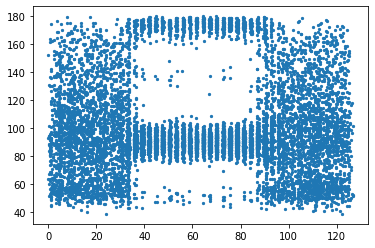

In [21]:
x,y = [],[]
for i in copy_list_nbnb:
    i.cal_angle()
    for j in i.angle:
        x.append(i.x)
        y.append(j)

plt.scatter(x,y,s=5)

# l got it!

In [22]:
# 把Nb-Nb距离最远的去掉之后 应该说大致的区域是可以是可以分析出来了

#分析程序
#大概意思就是 一个点80%的angle只有在80-100和170-180附近才算是cry
for i in copy_list_nbnb:
    count = 0
    sum_all = 0
    i.cry = 0
    for j in i.angle:
        if(80<j<100 or 170<j<180):
            count+=1
        sum_all+=1
    if(sum_all!=0):   
        cry_ratio = count/sum_all
    if(cry_ratio>0.8):
        i.cry=1

#注意有的sum为0  一会儿去观察一下为什么

x,y=[],[]
cry_x,cry_y = [],[]

for i in copy_list_nbnb:
    if(i.cry==1):
        cry_x.append(i.x)
        cry_y.append(i.z)
    else:
        x.append(i.x)
        y.append(i.z)
        
# 画图 
plt.scatter(x,y,s=5,c='b')
plt.scatter(cry_x,cry_y,s=5,c='r')

#分析程序
#大概意思就是 一个点80%的angle只有在70-110和165-180附近才算是cry
for i in copy_list_nbnb:
    count = 0
    sum_all = 0
    i.cry = 0
    for j in i.angle:
        if(70<j<110 or 165<j<180):
            count+=1
        sum_all+=1
    if(sum_all!=0):   
        cry_ratio = count/sum_all
    if(cry_ratio>0.8):
        i.cry=1

#注意有的sum为0  一会儿去观察一下为什么

x,y=[],[]
cry_x,cry_y = [],[]
for i in copy_list_nbnb:
    if(i.cry==1):
        cry_x.append(i.x)
        cry_y.append(i.z)
    else:
        x.append(i.x)
        y.append(i.z)

        
# 画图 
plt.scatter(x,y,s=5,c='b')
plt.scatter(cry_x,cry_y,s=5,c='r')

In [38]:
for i in copy_list_nbnb[:3]:
    for j in i.neighbor_atom:
        print(j)
    print("/n")

[50.29914, 7.785868, 35.18098, 3.732985709870851]
[47.46494, 6.040988, 30.81548, 3.900976554261768]
[53.19394, 6.233308, 30.60708, 4.060977628909076]
[53.21594, 3.063278, 35.48778, 4.089926353420072]
[50.09094, 1.483968, 30.54978, 4.100387638028875]
[47.31854, 2.729528, 35.33228, 4.267408193376865]
/n
[25.97474, 2.808908, 63.42818, 3.667468960017109]
[28.53104, 1.987868, 69.15718, 3.7216855161242504]
[29.98914, 3.561468, 63.26418, 4.1742454677856395]
/n
[31.91264, 5.334458, 29.97428, 3.3235039269572093]
[35.67644, 5.909148, 30.76558, 3.5335728685849954]
[33.25254, 1.770448, 30.59998, 3.7803541714500777]
[32.99034, 7.733658, 35.41518, 3.8900470835839505]
[30.49554, 2.896428, 35.68068, 4.22918543107299]
[35.95714, 2.980018, 35.90468, 4.3817772184468735]
/n


# 单个判断不够严谨  得再来一个

#建议不要存 原子与周围原子的信息  而是应该存相对应的索引 这样有利于相互之间的联系


#观察一下 为什么有的有0
x,y = [],[]
for i in copy_list_nbnb:
    if(len(i.angle)<3):
        i.show()
        x.append(i.x)
        y.append(i.z)
plt.scatter(x,y)

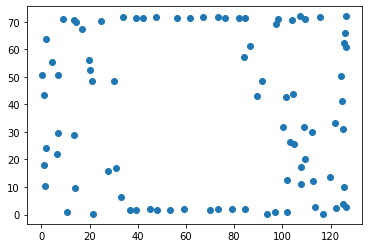

In [25]:
#观察一下 为什么有的有0
x,y = [],[]
for i in copy_list_nbnb:
    if(len(i.neighbor_atom)<=2):
        x.append(i.x)
        y.append(i.z)
plt.scatter(x,y)

# 把后续程序先完成的写完，即再把分析好的文件写到另外一个文本当中


In [26]:
#仿照着读取的格式写回文件
#6200        
#Atoms
#O     25.749800     0.163082      34.17320
#O     40.465500     1.365650      31.15460


In [28]:
#看文件是否存在 存在也删了 都要重建
if not os.path.exists(new_name):
    os.system(r'touch {}'.format(new_name))
else:
    os.remove(file_name)
    os.system(r'touch {}'.format(new_name))

In [29]:
#先把文件头写上去
with open(new_name,'a') as file:
        file.write("{} \n".format(6200))
        file.write("{} \n".format("Atoms"))

#如果cry标志位为1  那么写入的原子name为Ag
with open(new_name,'a') as file:
    for i in copy_list_nbnb:
        if(i.cry==1):
            file.write("{}    {}    {}    {}\n".format("Ag",i.x,i.y,i.z))
        else:
            file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
#再写入其他原子
with open(new_name,'a') as file:
    for i in o_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
    for i in si_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
    for i in li_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))

# 之后再从前往后地把每一帧的数据都读取 再写回文件  完整分析

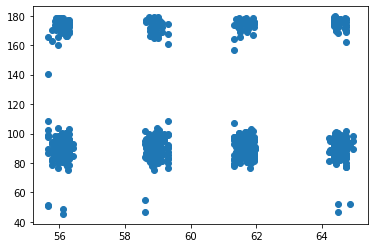

In [30]:
#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in copy_list_nbnb:
    if(55<i.x<65):
        for j in i.angle:
            y.append(j)
            x.append(i.x)
plt.scatter(x,y)


# 下面是分析Nb-O之间的键角分布的 

#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in nb_O_list:
    if(30<i.x<90):
        for j in i.angle:
            y.append(j)
            x.append(i.x)
plt.scatter(x,y)

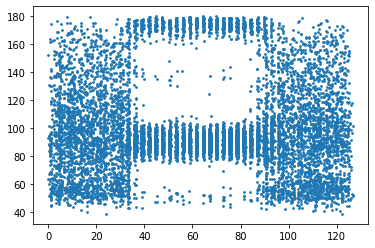

In [31]:
#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in copy_list_nbnb:
    for j in i.angle:
        y.append(j)
        x.append(i.x)
plt.scatter(x,y,s=3)

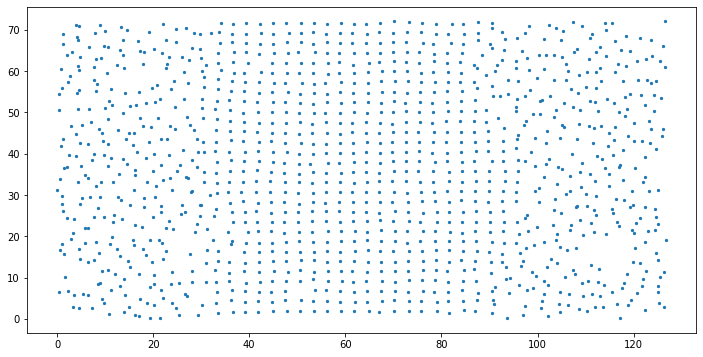

In [32]:
#此处是为了观察Nb的x分布
x,y = [],[]
for i in copy_list_nbnb:
        y.append(i.z)
        x.append(i.x)
plt.figure(figsize=(12,6))
plt.scatter(x,y,s=5)

# 判断原子是否共面的方法 速度解决问题

##第一种 先由原子形成面 再判断面是否能被一定数量的原子所承认 

#计算晶体区域的平均dis
x,y = [],[]
for i in copy_list_nbnb:
    t = 0
    count = 0
    for j in i.neighbor_atom:
        t += j[-1]
        count +=1
    x.append(i.x)
    y.append(t/count)
plt.scatter(x,y)

x1,y1 = [],[]

for i in range(len(x)):
    if(45<x[i]<80):
        x1.append(x[i])
        y1.append(y[i])
        
plt.scatter(x1,y1)